## Assignment - Predict if the client will subscribe a term deposit or not

Nama : Ni Made Kirei Kharisma Handayani

Kode Peserta : PYTN-KS08-002

### a. Import Package

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  cross_val_score, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pickle 

%matplotlib inline

### b. Data Loading

In [2]:
df_bank_add = pd.read_csv('dataset/bank-additional-full.csv',sep=';',decimal=',')

print('Data loaded...')

Data loaded...


In [3]:
df_bank_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  int64 
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  int64 
 11  campaign        41188 non-null  int64 
 12  pdays           41188 non-null  int64 
 13  previous        41188 non-null  int64 
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [5]:
# cek missing values dengan isnull().sum()
df_bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data sudah terbebas dari missing value

In [6]:
df_bank_add.shape

(41188, 21)

Data memiliki ukuran 41188 baris dan 21 kolom

In [7]:
df_bank_add.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Dapat diketahui bahwa setiap aribut dari dataset memiliki value lebih dari satu jneis

In [8]:
df_bank_add.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


Atribut 'duration', 'campaign', dan 'previous' memiliki nilai std yang lebih besar daripada nilai mean sehingga dapat diketahui bahwa data pada atribut tersebut cenderung memiliki outlier

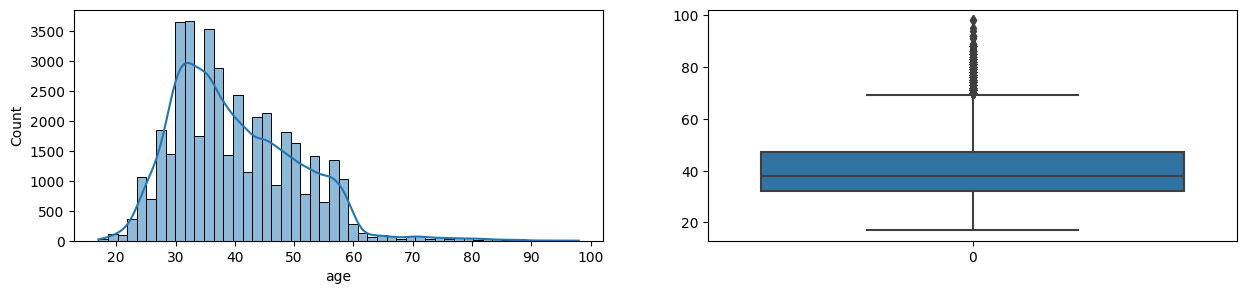

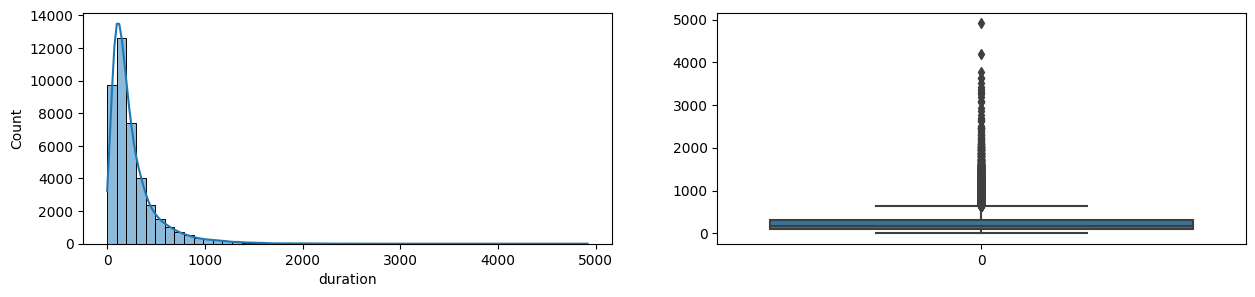

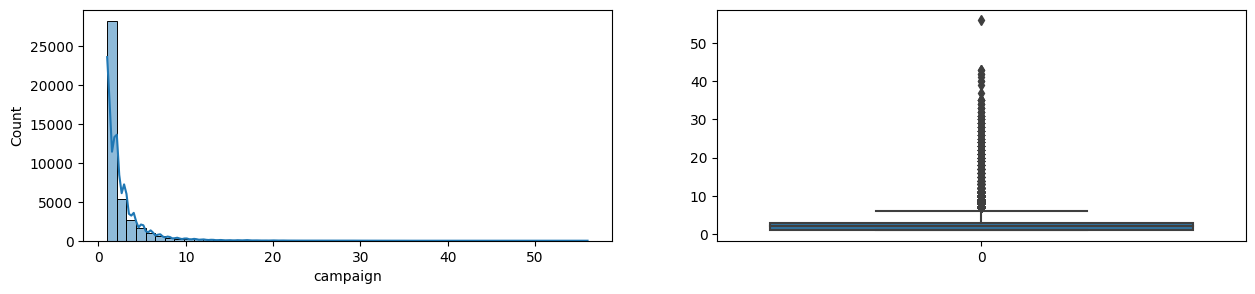

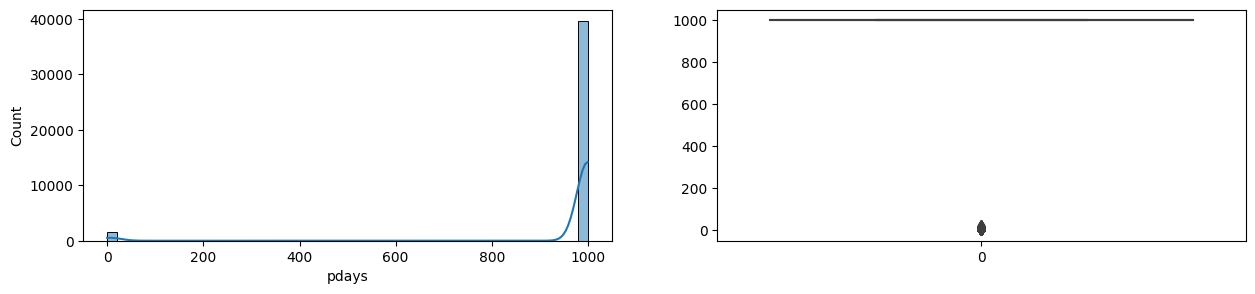

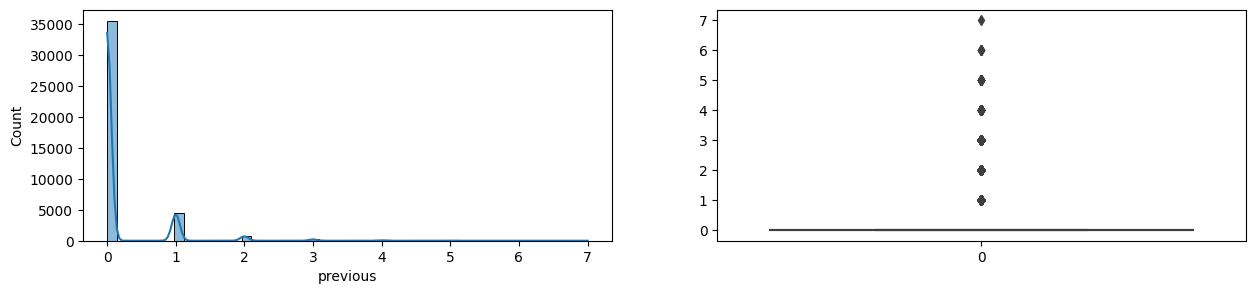

In [9]:
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous']

for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df_bank_add[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df_bank_add[x], ax=ax[1])

Dapat dilihat bahwa data tersebut memiliki banyak outliers

In [10]:
# Membuat fungsi untuk menghilangkan nilai-nilai outlier
def RemoveOutliers(df, num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Range value of outliers in {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
        
RemoveOutliers(df_bank_add, num_col)

Range value of outliers in age : <9.5 atau >69.5
Range value of outliers in duration : <-223.5 atau >644.5
Range value of outliers in campaign : <-2.0 atau >6.0
Range value of outliers in pdays : <999.0 atau >999.0
Range value of outliers in previous : <0.0 atau >0.0


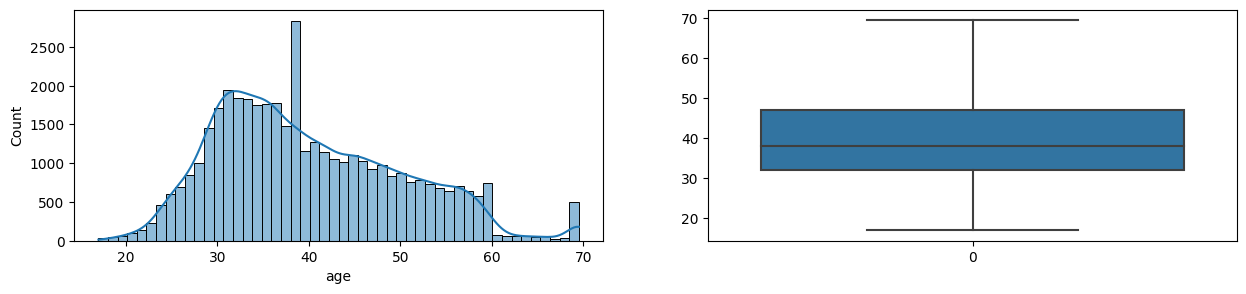

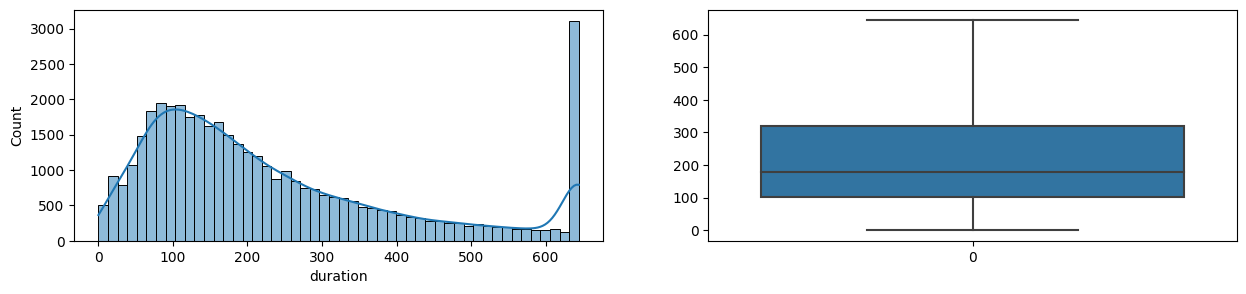

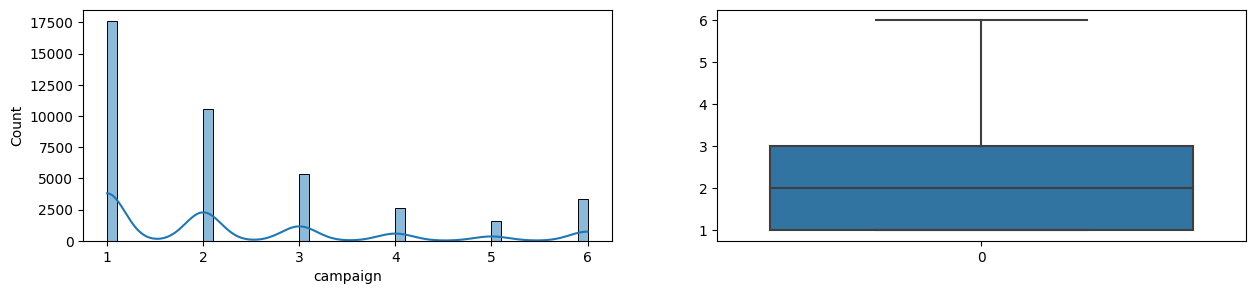

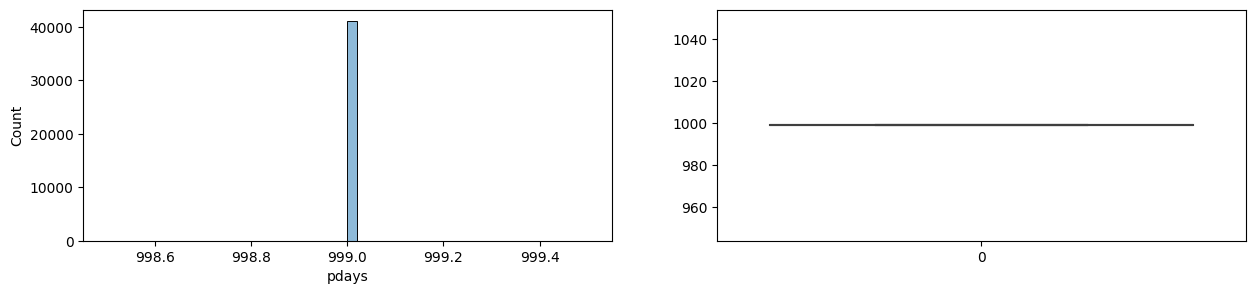

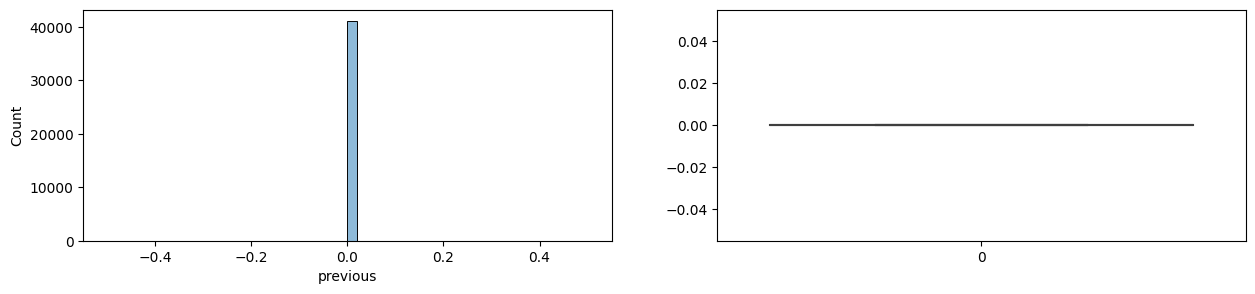

In [11]:
for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df_bank_add[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df_bank_add[x], ax=ax[1])

Terlihat bahwa data sudah terbebas dari outliers

### c. Data Prepocessing

#### Encoding

In [12]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  object 
 16  cons.price.idx  41188 non-null  object 
 17  cons.conf.idx   41188 non-null 

- ##### Mengubah data bertipe object menjadi data bertipe numerik

In [13]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns:=[
                                                    'job',
                                                    'marital',
                                                    'education',
                                                    'default',
                                                    'housing',
                                                    'loan',
                                                    'contact',
                                                    'month',
                                                    'day_of_week',
                                                    'poutcome',
                                                    'emp.var.rate',
                                                    'cons.price.idx',
                                                    'cons.conf.idx',
                                                    'euribor3m',
                                                    'nr.employed',
                                                    'y'
                                                    ]

))
])

#Membuat variabel df_ep untuk menampung hasil encode
df_ep = encoding_pipeline.fit_transform(df_bank_add)

In [14]:
df_ep.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,8,18,9,287,8,0


In [15]:
df_ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  int32  
 16  cons.price.idx  41188 non-null  int32  
 17  cons.conf.idx   41188 non-null 

- ##### Mencari korelasi antar atribut

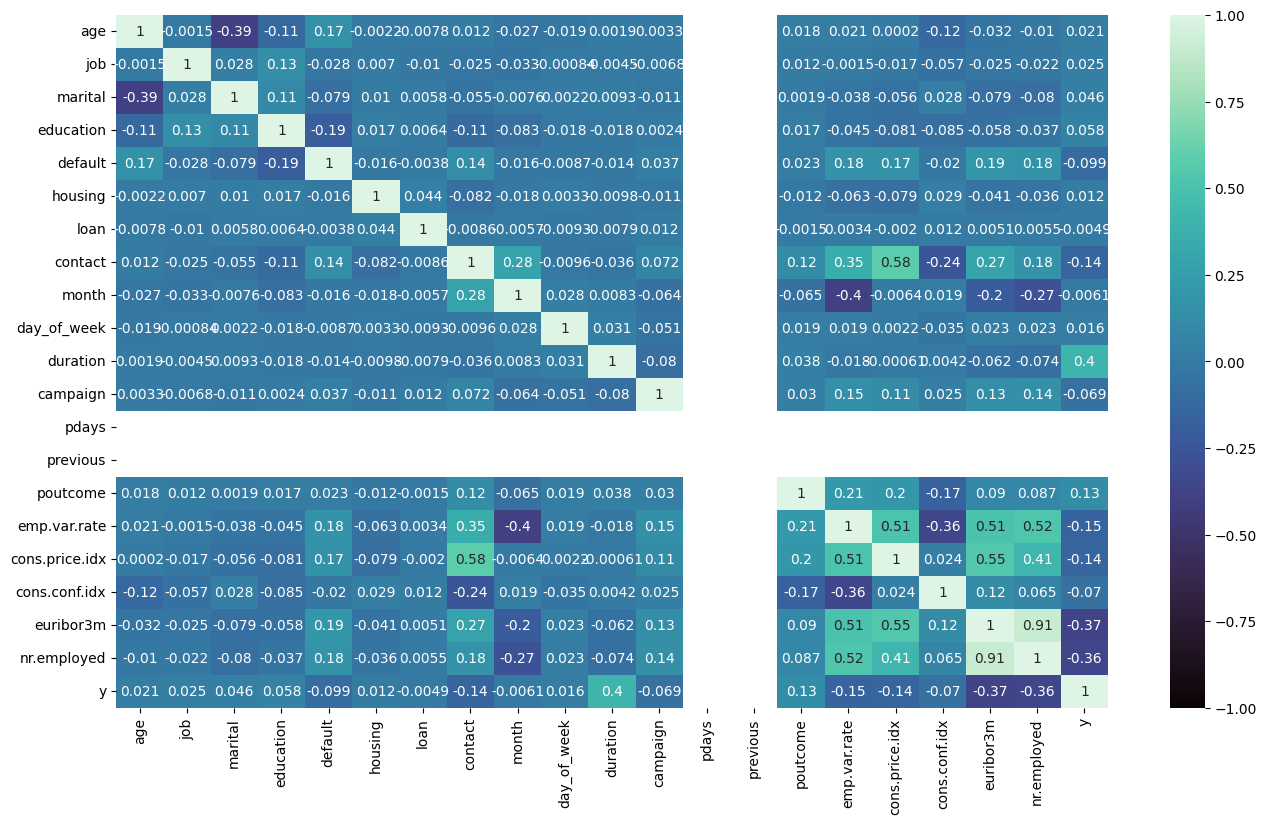

In [16]:
# Melihat korelasi keseluruhan atribut data
plt.figure(figsize=(16,9))
sns.heatmap(df_ep.corr(),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

- ##### Mencari korelasi tiap atribut dengan atribut y

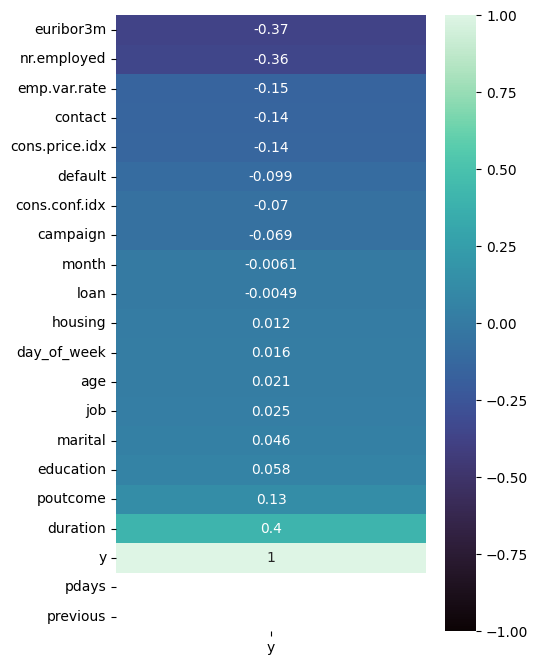

In [17]:
# Melihat korelasi seluruh atribut data terhadap y
plt.figure(figsize=(5, 8))
sns.heatmap(df_ep.corr()[['y']].sort_values(by='y'),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

In [18]:
df_predict = df_ep.drop(columns=['month', 'loan', 'housing', 'day_of_week'])
df_predict.head()

,age,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,1,261.0,1,999,0,1,8,18,9,287,8,0
1,57.0,7,1,3,1,1,149.0,1,999,0,1,8,18,9,287,8,0
2,37.0,7,1,3,0,1,226.0,1,999,0,1,8,18,9,287,8,0
3,40.0,0,1,1,0,1,151.0,1,999,0,1,8,18,9,287,8,0
4,56.0,7,1,3,0,1,307.0,1,999,0,1,8,18,9,287,8,0


### d. Data Training

In [36]:
y = df_predict['y']
X = df_predict.drop(['y'], axis=1)

In [37]:
print("Before oversampling : ", Counter(y))

Before oversampling :  Counter({0: 36548, 1: 4640})


- ##### Menyeimbangkan jumlah data

In [38]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)
print("After oversampling : ", Counter(y_sm))

After oversampling :  Counter({0: 36548, 1: 36548})


- ##### Splitting data

In [39]:
# Splitting data untuk training, testing, dan validasi
X_new, X_val, y_new, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

- ##### Scalling data

In [40]:
# Melakukan rescalling terhadap data yang memiliki distribusi data berjauhan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_training = scaler.fit_transform(X_train)
x_testing = scaler.transform(X_test)
x_validation = scaler.transform(X_val)

### e. Evaluation

In [41]:
classifiers = [KNeighborsClassifier(3),
               SVC(probability=True),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               LogisticRegression(),
               GaussianNB()]

log_cols = ['Classifier', 'Accuracy']

log = pd.DataFrame(columns=log_cols)

SSS = StratifiedShuffleSplit(n_splits=10, test_size=1/3, random_state=0)

C:\Users\Kirei\AppData\Local\Temp\ipykernel_23360\2699812016.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Kirei\AppData\Local\Temp\ipykernel_23360\2699812016.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Kirei\AppData\Local\Temp\ipykernel_23360\2699812016.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Kirei\AppData\Local\Temp\ipykernel_23360\2699812016.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Kirei\AppData\Local\Temp\ipykernel_23360\2699812016.py:16: FutureWa

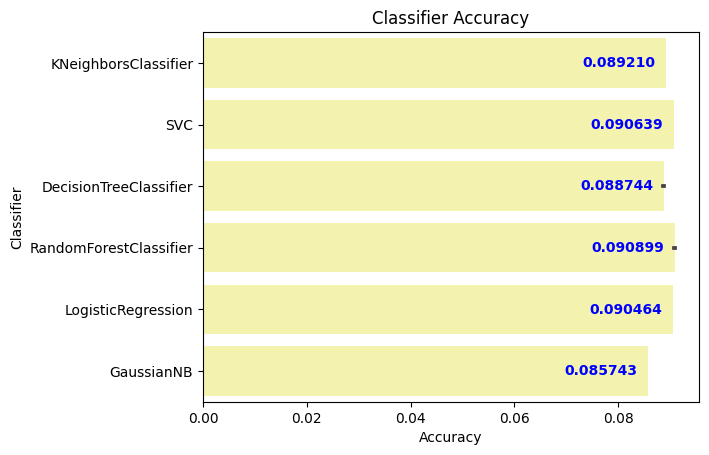

In [45]:
acc_dictio = {}

for item in classifiers :
    name = item.__class__.__name__
    item.fit(x_training, y_train)
    training_predict = item.predict(x_testing)
    acc = accuracy_score(y_test, training_predict)
    if name in acc_dictio:
      acc_dictio[name] += acc
    else:
        acc_dictio[name] = acc

for item in acc_dictio :
  acc_dictio[item] = acc_dictio[item]/10
  log_entry = pd.DataFrame([[item, acc_dictio[item]]], columns=log_cols)
  log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

ax = sns.set_color_codes('pastel')
ax = sns.barplot(x='Accuracy', y='Classifier', data=log, color='y')
for i in ax.containers :
  ax.bar_label(i,fmt="%.6f",padding=-60,color="blue",fontweight="bold")

Berdasarkan bar plot di atas dapat dilihat bahwa model dengan akurasi terbaik adalah model RandomForestClassifier

### f. Improve Model

- ##### Mencari parameter model dengan performa terbaik

In [46]:
# Dengan model RandomForestClassifier
model_rfc = RandomForestClassifier()
param_grid = {'n_estimators':[100,200, 300, 400, 500],
              'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'bootstrap' : [True, False],
              'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'class_weight' : ['balanced', 'balanced_subsample'],
              'min_samples_leaf':[1, 2, 3, 4, 5]}
rscv = RandomizedSearchCV(model_rfc, param_grid, cv=10, scoring='f1_micro')
rscv.fit(x_training, y_train) 
print(rscv.best_params_)
print(rscv.best_score_)

c:\Users\Kirei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Kirei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Kirei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 19, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
0.8984656915531731


In [47]:
# Menampilkan parameter terbaik model
model_rfc = rscv.best_estimator_
print(model_rfc)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=19, max_features='auto',
                       min_samples_leaf=3)


In [52]:
# Menampilkan hasil prediksi
y_predict_test = model_rfc.predict(x_testing)
print(y_predict_test)


[0 1 0 ... 0 0 0]


In [53]:
# mendapatkan laporan/report mengenai klasifikasi
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6559
           1       0.53      0.80      0.64       855

    accuracy                           0.90      7414
   macro avg       0.75      0.85      0.79      7414
weighted avg       0.92      0.90      0.90      7414



### g. Model Inference

In [56]:
# Memprediksi data baru 
y_predict_val = model_rfc.predict(x_validation)
y_predict_val

array([1, 0, 0, ..., 0, 0, 1])

In [57]:
# mendapatkan laporan/report mengenai klasifikasi
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3665
           1       0.52      0.82      0.64       454

    accuracy                           0.90      4119
   macro avg       0.75      0.87      0.79      4119
weighted avg       0.93      0.90      0.91      4119



[[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]]

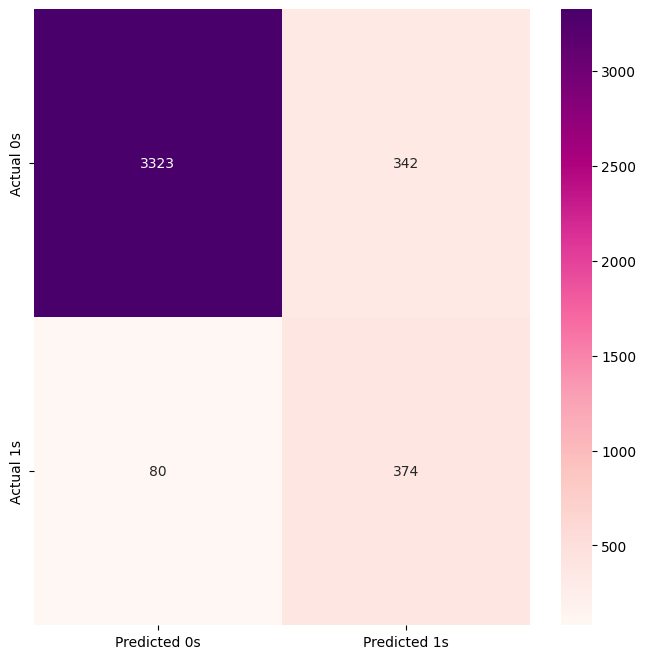

In [59]:
# Memvisualisasikan confusion matrix
cm_rfc = confusion_matrix(y_val, y_predict_val)
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_rfc, annot=True, fmt=".0f", ax=ax, cmap='RdPu')

ax.xaxis.set(ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticklabels=('Actual 0s', 'Actual 1s'))

### h. Save Model

In [61]:
pickle.dump(model_rfc, open('predict_bank_rfc.pkl', 'wb'))

### Kesimpulan 
Berdasarkan program di atas dapat disimpulkan bahwa :
- Dalam dataset bank-additional-full.csv yang awalnya memiliki 21 atribut hanya 17 atribut yang digunakan untuk memprediksi
- Setelah melakukan predict degan beberapa model seperti KNN, SVC, Decision Tree Classifier, Random Forest Classifier, Logistic Regression, dan Naive Bayes dapat diketahui bahwa hasil prediksi terbaik diperoleh dengan menggunakan model Random Forest Classifier
- Dengan menggunakan model Random Forest Classifier diperoleh nilai akurasi sebesar 0.90899